<a href="https://colab.research.google.com/github/Arouoj/Investigating-Netflix-Movies/blob/main/Devices_Price_Classification_System_using_Python_and_Spring_Boot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Don't forget to do
- Residual Analysis
- Interaction Effects
- Log Normalization
- Scalling the Data

https://github.com/campusx-official/laptop-price-predictor-regression-project <br>
link for a
similar https://docs.streamlit.io/get-started/installation/command-line

# Mounting to Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
%ls

drive/  sample_data/


In [3]:
%cd drive/MyDrive/Maids Test

/content/drive/MyDrive/Maids Test


# Importing Dependencies

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb

# Loading The Data

In [5]:
Trainset=pd.read_excel("Trainset.xlsx")
Testset=pd.read_excel("Testset.xlsx")

In [6]:
Trainset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0.0,1.0,2.0,0.8,106.0,6.0,...,1222.0,1890.0,668.0,13.0,4.0,19,1,1,0,0
1996,1965,1,2.6,1,0.0,0.0,39.0,0.2,187.0,4.0,...,915.0,1965.0,2032.0,11.0,10.0,16,1,1,1,2
1997,1911,0,0.9,1,1.0,1.0,36.0,0.7,108.0,8.0,...,868.0,1632.0,3057.0,9.0,1.0,5,1,1,0,3
1998,1512,0,0.9,0,4.0,1.0,46.0,0.1,145.0,5.0,...,336.0,670.0,869.0,18.0,10.0,19,1,1,1,0


Dataset columns are as follows:<br>
■ id - ID<br>
■ battery_power - Total energy a battery can store in one time measured in mAh<br>
■ blue - Has Bluetooth or not<br>
■ clock_speed - The speed at which the microprocessor executes instructions<br>
■ dual_sim - Has dual sim support or not<br>
■ fc - Front Camera megapixels<br>
■ four_g - Has 4G or not<br>
■ int_memory - Internal Memory in Gigabytes<br>
■ m_dep - Mobile Depth in cm<br>
■ mobile_wt - Weight of mobile phone<br>
■ n_cores - Number of cores of the processor<br>
■ pc - Primary Camera megapixels<br>
■ px_height - Pixel Resolution Height<br>
■ px_width - Pixel Resolution Width<br>
■ ram - Random Access Memory in Megabytes<br>
■ sc_h - Screen Height of mobile in cm<br>
■ sc_w - Screen Width of mobile in cm<br>
■ talk_time - longest time that a single battery charge will last when you are<br>
■ three_g - Has 3G or not<br>
■ touch_screen - Has touch screen or not<br>
■ wifi - Has wifi or not<br>
■ price_range - This is the target variable with <br>the value of:<br>
● 0 (low cost)<br>
● 1 (medium cost)<br>
● 2 (high cost)<br>
● 3 (very high cost)<br>


# Preprocesssing

**checking if the training and testing sets are consistent in features!**

In [7]:
tr_cols=set(Trainset.columns)
tes_cols=set(Testset.columns)

In [8]:
non_common_features = list(tr_cols.symmetric_difference(tes_cols))
print(non_common_features)

['price_range', 'id']


**Only Target Variable and id are non-common features**

In [9]:
df=Trainset.copy()

In [10]:
#checking for data information, Number of features, datatype and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

**All the Data Are Numerical, Number of Features is Reasonable and the data has a very small precentage of missing values(below 1%)**

In [11]:
Testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [12]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [13]:
prec_misssing=df.isna().sum().max()*100/len(df)
print(prec_misssing,"%")

0.25 %


In [14]:
cols_with_missing= df.columns[df.isna().sum()>0]
missing_ind_list=[]
for col in cols_with_missing:
  lst=list(df[df[col].isna()].index)
  print(lst)
  missing_ind_list += lst
missing_ind_list=list(set(missing_ind_list))

[157, 158, 261, 276, 371]
[157, 158, 261, 276, 371]
[157, 158, 261, 276, 371]
[157, 158, 217, 261, 371]
[157, 158, 261, 371]
[157, 158, 261, 371]
[157, 158, 261, 292, 293]
[261, 292, 293, 341]
[261, 341]
[261, 341]
[341]
[341]


In [15]:
len(missing_ind_list)*100/len(df)

0.45

We have 9 missing values at most, which is 0.25% <br>
and after checking if there any pattern in the missing values or they are common.<br>
Dropping is the best choice.

In [16]:
df.dropna(inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1991 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1991 non-null   int64  
 1   blue           1991 non-null   int64  
 2   clock_speed    1991 non-null   float64
 3   dual_sim       1991 non-null   int64  
 4   fc             1991 non-null   float64
 5   four_g         1991 non-null   float64
 6   int_memory     1991 non-null   float64
 7   m_dep          1991 non-null   float64
 8   mobile_wt      1991 non-null   float64
 9   n_cores        1991 non-null   float64
 10  pc             1991 non-null   float64
 11  px_height      1991 non-null   float64
 12  px_width       1991 non-null   float64
 13  ram            1991 non-null   float64
 14  sc_h           1991 non-null   float64
 15  sc_w           1991 non-null   float64
 16  talk_time      1991 non-null   int64  
 17  three_g        1991 non-null   int64  
 18  touch_screen 

# Splitting Data

**Since the test set provided does not have target values, We will split the training set into a training and a validation set to evaluate on it.**

In [18]:
x_train, x_val, y_train, y_val=train_test_split(df.drop("price_range",axis=1),df["price_range"],test_size=0.2, random_state=54)

In [19]:
print(len(x_train),len(y_val))

1592 399


In [20]:
#Checking for balancedness within the target variable
y_val=pd.Series(y_val)
y_train=pd.Series(y_train)
print(y_val.value_counts(),"   ",y_train.value_counts())

price_range
0    109
1    104
2     97
3     89
Name: count, dtype: int64     price_range
3    408
2    402
1    392
0    390
Name: count, dtype: int64


# Exploratory Data Analysis (EDA)

In [21]:
#since all the features are numerical we can provide a statistics summary
x_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000
mean,1239.769472,0.498116,1.517148,0.505025,4.326633,0.532663,32.221734,0.501508,140.163945,4.540201,9.856156,658.129397,1251.073492,2140.103643,12.291457,5.712312,10.993090,0.765704,0.496231,0.501256
std,438.075386,0.500154,0.815709,0.500132,4.386293,0.499089,18.151031,0.287489,35.448391,2.279555,6.103036,445.807461,432.391277,1082.595653,4.195173,4.310705,5.432456,0.423691,0.500143,0.500156
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,851.000000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,4.000000,294.750000,872.750000,1214.000000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000
50%,1235.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,5.000000,10.000000,579.500000,1251.000000,2172.500000,12.000000,5.000000,11.000000,1.000000,0.000000,1.000000
75%,1608.500000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,961.000000,1638.000000,3097.750000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000
max,1997.000000,1.000000,3.000000,1.000000,18.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000


**The statistical summary indicates a significant variance in the means of the features.**<br> **To ensure effective training and improve model performance, it is essential to apply a scaler to normalize the data**

**Also some features seems to exhibit outliers like px_height**<br>
<br>
**For Further Analysis and Illustrations**

In [22]:
#Splitting the data into categorical features and continious features
cat_cols=[]
def continious_categorical_splitter():
  for col in x_train.columns:
    cat_len=len(x_train[col].value_counts())
    if cat_len <= 8:
      print(col,cat_len)
      cat_cols.append(col)


continious_categorical_splitter()
cat_cols

blue 2
dual_sim 2
four_g 2
n_cores 8
three_g 2
touch_screen 2
wifi 2


['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi']

**As we can see the only six features are categorical(Binary)**<br>
**Now we explor the data mpre visually**

In [23]:
cont_cols=list(set(x_train.columns).symmetric_difference(set(cat_cols)))

In [24]:
cont_cols

['talk_time',
 'battery_power',
 'pc',
 'int_memory',
 'fc',
 'clock_speed',
 'px_height',
 'sc_h',
 'm_dep',
 'ram',
 'px_width',
 'mobile_wt',
 'sc_w']

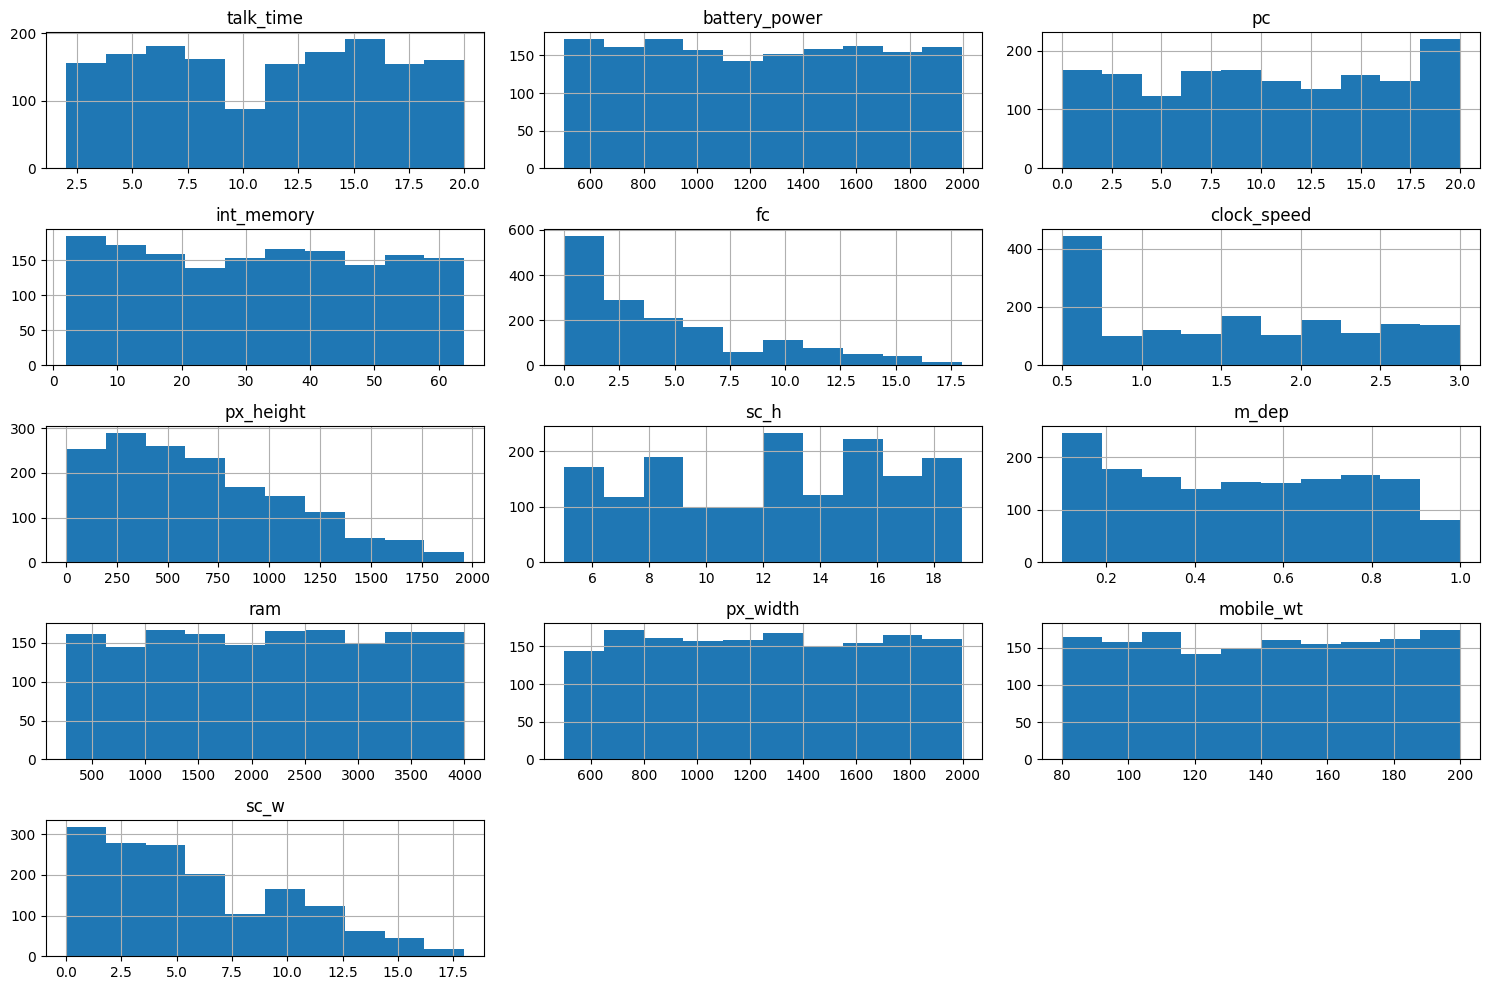

In [25]:
x_train[cont_cols].hist(bins=10, figsize=(15, 10), layout=(5, 3))
plt.tight_layout()
plt.show()

In [26]:
# Calculating skewness and kurtosis mathematically
skewness = x_train[cont_cols].skew()
kurtosis = x_train[cont_cols].kurtosis()

print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)
#A skewness value close to 0 suggests a normal distribution.
#Positive skewness indicates a right-skewed distribution, while negative skewness indicates a left-skewed distribution.
#On the other hand A kurtosis value close to 3 suggests a normal distribution.
#Higher values indicate heavier tails, and lower values indicate lighter tails.

Skewness:
 talk_time       -0.004584
battery_power    0.028950
pc               0.027470
int_memory       0.048713
fc               1.005900
clock_speed      0.185406
px_height        0.649212
sc_h            -0.110352
m_dep            0.095012
ram             -0.011486
px_width         0.003964
mobile_wt        0.009420
sc_w             0.609021
dtype: float64

Kurtosis:
 talk_time       -1.204135
battery_power   -1.227400
pc              -1.190518
int_memory      -1.221800
fc               0.181522
clock_speed     -1.321428
px_height       -0.334398
sc_h            -1.180523
m_dep           -1.278328
ram             -1.201950
px_width        -1.198437
mobile_wt       -1.217789
sc_w            -0.428483
dtype: float64


**As we can see,several features show noticeable skewness**<br>
**m_dpth, fc, clock_speed, px_heieght and sc_w exhibits a high left skewness compared to other features;**<br>
**indicating that  most of the values are concentrated towards the lower end of the range**<br>

**talk_time and ram: These features have very slight negative skewness, indicating slight concentration towards higher values, but the skewness is minimal.**<br>
**conclusion:**<br>
- **Features with significantly low kurtosis values may not have many outliers**<br>
- **Due to skewness certain models are chosen for training on.**<br>
- **For highly skewed features like fc, px_height, and sc_w, we will consider transformations such as log transformation to normalize the distribution.***<br>


**These skewnesses could indicate a market trend towards budget devices or older models in the dataset.**

<ipython-input-27-89876003d654>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(x_train[col], shade=True)
<ipython-input-27-89876003d654>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(x_train[col], shade=True)
<ipython-input-27-89876003d654>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(x_train[col], shade=True)
<ipython-input-27-89876003d654>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(x_train[col], shade=True)
<ipython-input-27-89876003d654>:5: FutureWarning: 

`shade` is now deprecate

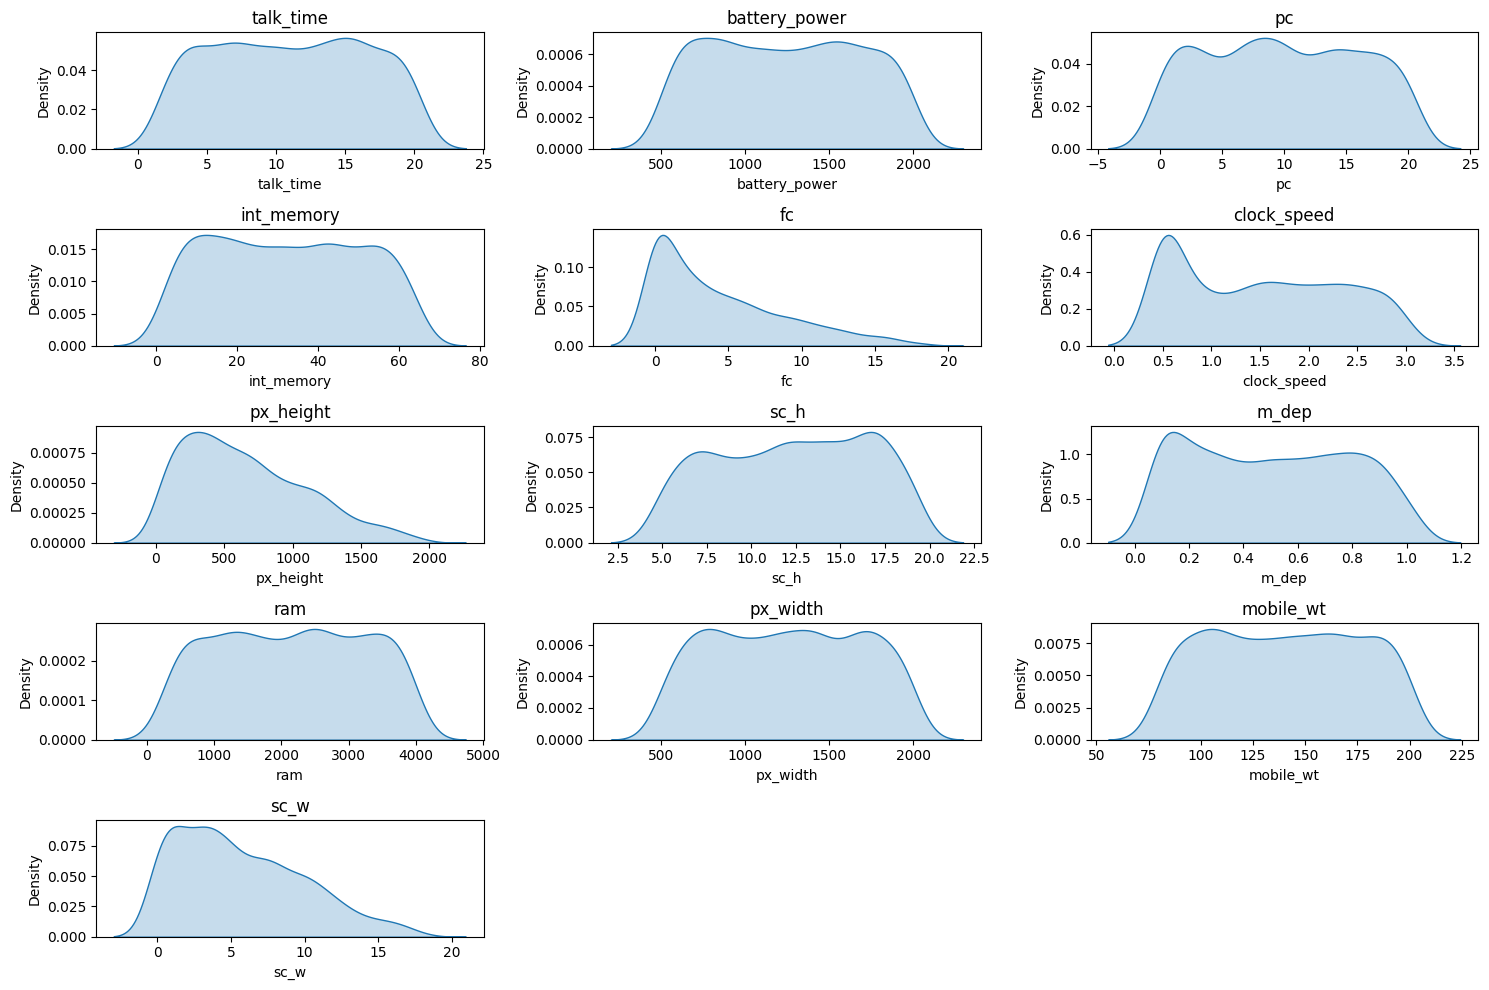

In [27]:
# Density Plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(cont_cols):
    plt.subplot(5, 3, i + 1)
    sbn.kdeplot(x_train[col], shade=True)
    plt.title(col)
plt.tight_layout()
plt.show()

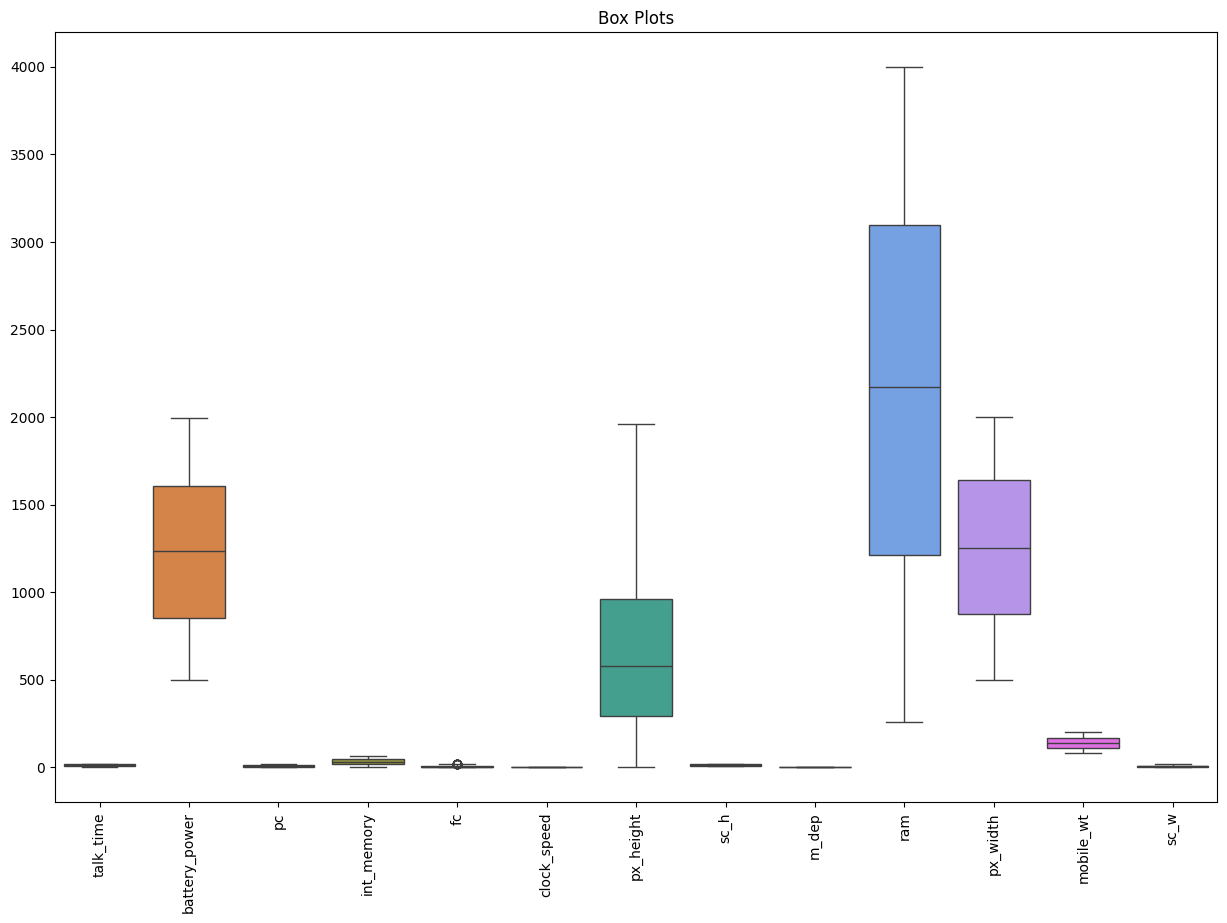

In [28]:
# Box Plots
plt.figure(figsize=(15, 10))
sbn.boxplot(x_train[cont_cols])
plt.title("Box Plots")
plt.xticks(rotation=90)
plt.show()

**We can see that ram and px_height exhibits a significant outliers,However these outlier might be reasonable due to high or premium devices that are rarly sold because of its high price**<br>
**For Further certainity, we check the target values for these oultlier observations!**<br>
**Applying transformations such as log or square root to reduce the effect of outliers and normalize the distribution.**

In [29]:
df["price_range"][df["ram"]>3500].value_counts()

price_range
3    251
2     17
Name: count, dtype: int64

**As expected the all the outliers are in the high range of price**

In [30]:
df["price_range"][df["px_height"]>1600].value_counts()

price_range
3    31
1    19
2    12
0     2
Name: count, dtype: int64

**However in px_height the case is different and need further analysis**

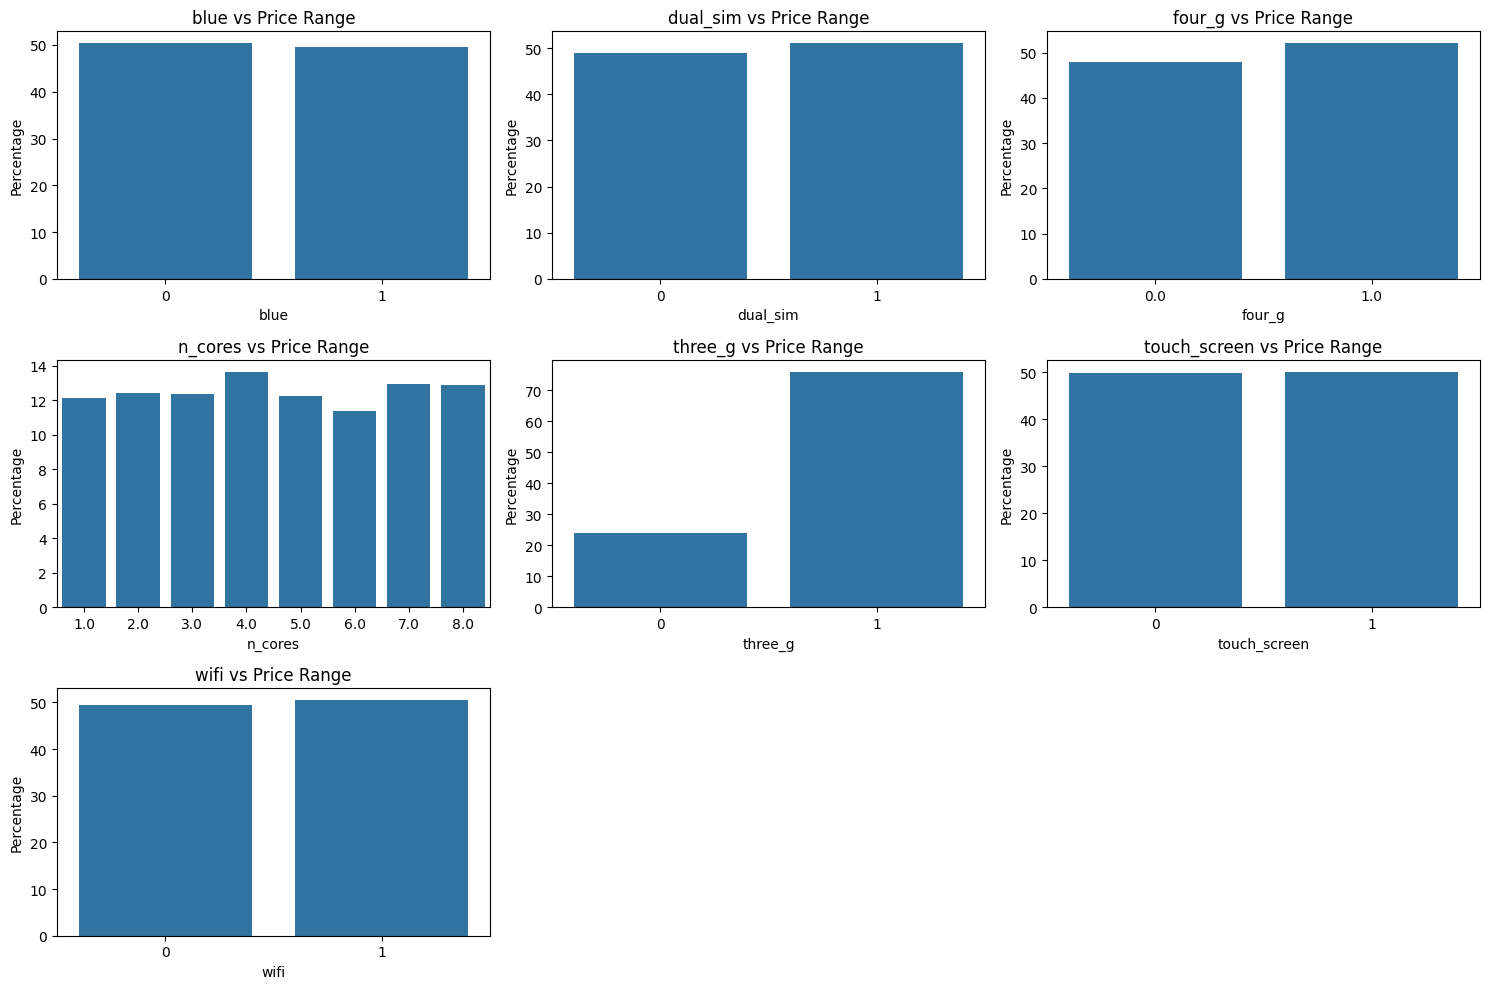

In [31]:
# Bar Plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(3, 3, i + 1)
    sbn.barplot(x=col, y='price_range', data=df, estimator=lambda x: len(x) / len(df) * 100)
    plt.ylabel('Percentage')
    plt.title(f'{col} vs Price Range')
plt.tight_layout()
plt.show()


- **Bluetooth, dual SIM, 4G, touch screen, and WiFi are standard across all price ranges,** indicating they are expected functionalities and do not differentiate device prices significantly.<br>
- **Also Variation in the number of processor cores, with a slight peak at 4 cores,** suggests that 4-core processors strike a balance between performance and cost, making them popular across different price ranges.<br>
- **High prevalence of 3G across all price ranges** indicates that 3G is an essential feature even though 4G is available and prevalent.<br>

## **we need to explore correlations between features and target, to make sure these insights are true**


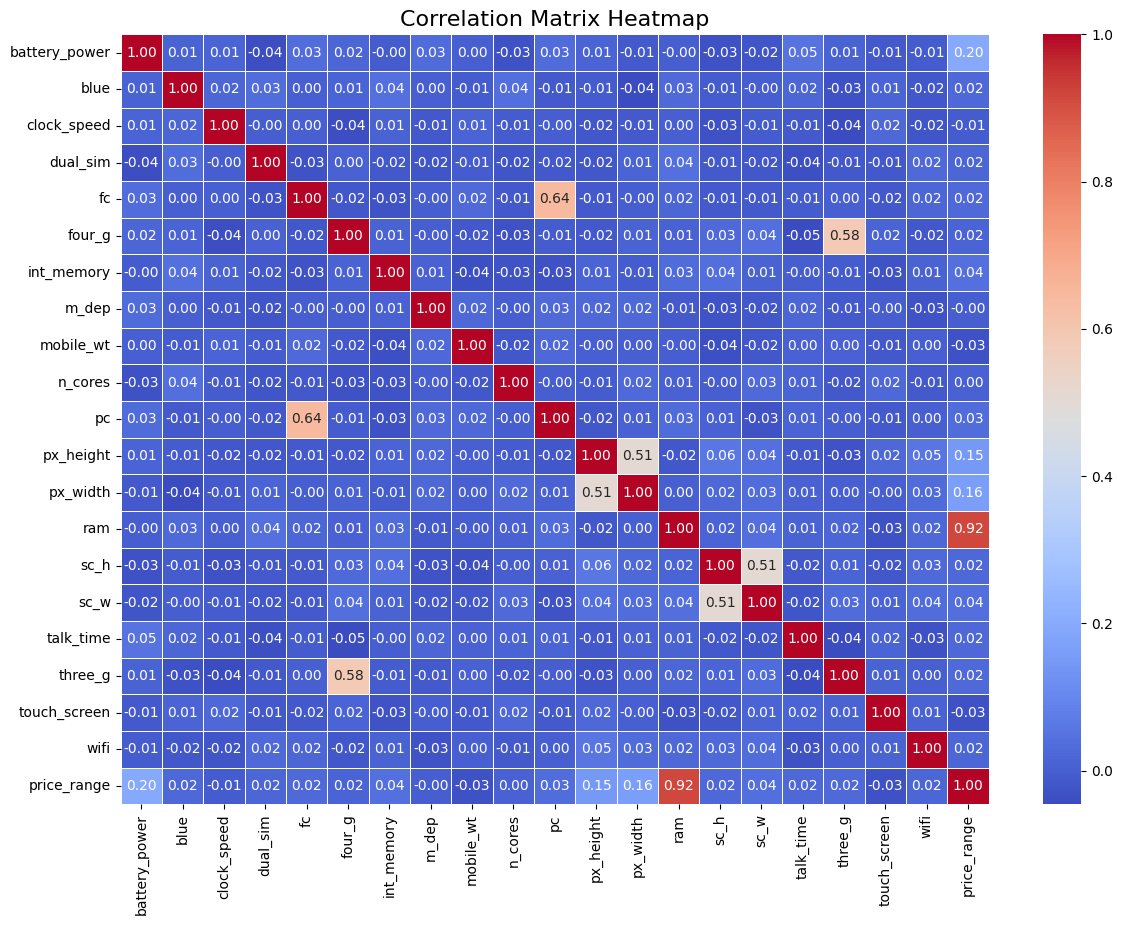

In [32]:
#Heat-map and Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(14, 10))
sbn.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()


- **We will focus on RAM as the most critical feature. Additionally, we will consider including battery power and pixel dimensions to improve the model’s accuracy.**
- **Furthermore, the rest of the features seem to have low correlation factors despite their practical importance. This suggests that some feature engineering techniques should be applied to improve these relationships.**

# Feature Engineering
## To understand why certain features have unexpected correlations we shall investigate anomalies.

In [33]:
#we will use feature importance to check for correlations between features and price range

model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

importances = model.feature_importances_
feature_names = x_train.columns
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values(by='importance', ascending=False)
print(feature_importances)


          feature  importance
13            ram    0.464367
0   battery_power    0.071516
12       px_width    0.060651
11      px_height    0.058337
8       mobile_wt    0.040906
6      int_memory    0.036697
16      talk_time    0.031451
2     clock_speed    0.030877
10             pc    0.030465
14           sc_h    0.030205
15           sc_w    0.029520
7           m_dep    0.026585
4              fc    0.026076
9         n_cores    0.022938
18   touch_screen    0.007162
1            blue    0.007020
19           wifi    0.007001
3        dual_sim    0.006799
5          four_g    0.006178
17        three_g    0.005249


In [34]:
# Trying Some Feature Interactions on ram, 3G and 4G
dum=df.copy()
dum['interaction'] = dum['n_cores'] * dum['ram']
print(dum[['interaction', 'price_range']].corr())


             interaction  price_range
interaction     1.000000     0.614737
price_range     0.614737     1.000000


In [35]:
from xgboost import XGBClassifier

# Train an XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(x_train, y_train)

# Check feature importance
xgb_importances = pd.DataFrame(xgb_model.feature_importances_, index=x_train.columns, columns=['importance'])
print(xgb_importances.sort_values(by='importance', ascending=False).head(20))


               importance
ram              0.424130
battery_power    0.129564
px_width         0.093894
px_height        0.089606
mobile_wt        0.032367
m_dep            0.027588
three_g          0.021775
fc               0.021677
pc               0.021219
int_memory       0.020903
talk_time        0.017373
sc_w             0.014873
touch_screen     0.014861
n_cores          0.013631
sc_h             0.013010
dual_sim         0.012179
clock_speed      0.010166
blue             0.007646
four_g           0.007003
wifi             0.006535


In [36]:
from sklearn.preprocessing import PolynomialFeatures

# Create interaction terms
dum=df.copy()
dum.dropna(inplace=True)
interaction_features = dum[['four_g', 'three_g', 'ram', 'battery_power']]
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
interaction_terms = poly.fit_transform(interaction_features)

# Create a new DataFrame with interaction terms
interaction_df = pd.DataFrame(interaction_terms, columns=poly.get_feature_names_out(interaction_features.columns))

# Combine with the original DataFrame
combined_df = pd.concat([dum, interaction_df], axis=1)

combined_df.dropna(inplace=True)
# Train a model with interaction terms


X = combined_df.drop('price_range', axis=1)
y = combined_df['price_range']

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)

model.fit(X_train, Y_train)

# Check feature importance again
feature_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=['importance'])
print(feature_importances.sort_values(by='importance', ascending=False).head(20))


                       importance
ram                      0.417494
battery_power            0.057215
px_height                0.046507
px_width                 0.046083
mobile_wt                0.032397
ram battery_power        0.030652
ram                      0.030234
int_memory               0.027841
battery_power            0.027460
talk_time                0.025218
pc                       0.024166
sc_w                     0.023182
sc_h                     0.022319
clock_speed              0.021831
three_g battery_power    0.021689
three_g ram              0.020664
m_dep                    0.019566
n_cores                  0.018454
fc                       0.017813
four_g ram               0.015731


- **As we can see there is no a significant differenses**

# Preparing for Training

## Normalizing the Data

## log transformation

In [38]:
# Log transformation for features with outliers
outlier_features = ['ram', 'px_height']

# Log transform the features
for feature in outlier_features:
    x_train[feature] = np.log1p(x_train[feature])
    x_val[feature] = np.log1p(x_val[feature])


In [39]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_val)

In [40]:
# Save the scaler
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

# Training

In [ ]:
model = xgb.XGBClassifier()
model.fit(x_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

# Evaluation Metrics

In [ ]:
y_pred = model.predict(x_test_scaled)
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

# Save the trained model for later use
import joblib
joblib.dump(model, 'xgboost_model.pkl')

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       109
           1       0.89      0.88      0.89       104
           2       0.82      0.87      0.84        97
           3       0.92      0.89      0.90        89

    accuracy                           0.90       399
   macro avg       0.90      0.90      0.90       399
weighted avg       0.90      0.90      0.90       399

Confusion Matrix:
[[104   5   0   0]
 [  3  92   9   0]
 [  0   6  84   7]
 [  0   0  10  79]]


['xgboost_model.pkl']

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Define the hyperparameters grid
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'n_estimators': [100, 200, 300, 400, 500],
    'min_child_weight': [1, 2, 3, 4],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1, 10],
    'reg_lambda': [0, 0.1, 0.5, 1, 10],
}

# Perform Randomized Search Cross Validation
xgb_random = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
xgb_random.fit(x_train_scaled, y_train)

# Get the best parameters
best_params_xgb = xgb_random.best_params_

# Train the model with the best parameters
optimized_model_xgb = xgb.XGBClassifier(**best_params_xgb)
optimized_model_xgb.fit(x_train_scaled, y_train)

# Evaluate the optimized model
y_pred_optimized_xgb = optimized_model_xgb.predict(x_test_scaled)
print("Optimized XGBoost Model Evaluation:")
print(classification_report(y_val, y_pred_optimized_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_optimized_xgb))


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Optimized XGBoost Model Evaluation:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       109
           1       0.91      0.89      0.90       104
           2       0.84      0.90      0.87        97
           3       0.93      0.92      0.93        89

    accuracy                           0.92       399
   macro avg       0.92      0.92      0.92       399
weighted avg       0.92      0.92      0.92       399

Confusion Matrix:
[[104   5   0   0]
 [  2  93   9   0]
 [  0   4  87   6]
 [  0   0   7  82]]


In [ ]:
# Get the best parameters
best_params_xgb = xgb_random.best_params_
print("Best Parameters found during Randomized Search:")
print(best_params_xgb)


Best Parameters found during Randomized Search:
{'subsample': 0.8, 'reg_lambda': 0, 'reg_alpha': 0, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.15, 'gamma': 0.2, 'colsample_bytree': 0.8}


# API

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.6 MB/s eta 0:00:00


In [ ]:
import streamlit as st

In [ ]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(optimized_model_xgb, f)